In [27]:
options(repr.plot.width  = 6,
        repr.plot.height = 6)

In [2]:
library(gamair)
data(hubble)
ls()

[1] "hubble"

In [3]:
?lm

In [4]:
hub.mod = lm(y~x-1, data=hubble)
summary(hub.mod)


Call:
lm(formula = y ~ x - 1, data = hubble)

Residuals:
   Min     1Q Median     3Q    Max 
-736.5 -132.5  -19.0  172.2  558.0 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x   76.581      3.965   19.32 1.03e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 258.9 on 23 degrees of freedom
Multiple R-squared:  0.9419,	Adjusted R-squared:  0.9394 
F-statistic: 373.1 on 1 and 23 DF,  p-value: 1.032e-15


        1         2         3         4         5         6         7         8 
 153.1623  701.4835 1236.0201 1374.6320 1675.5960  246.5914  859.2408  899.8288 
        9        10        11        12        13        14        15        16 
 277.9897 1056.8202  765.8117  805.6339  508.4990 1164.7996 1355.4867 1137.9962 
       17        18        19        20        21        22        23        24 
1242.1466 1208.4509 1143.3569 1683.2542  946.5433  343.8495  241.2307 1127.2749 


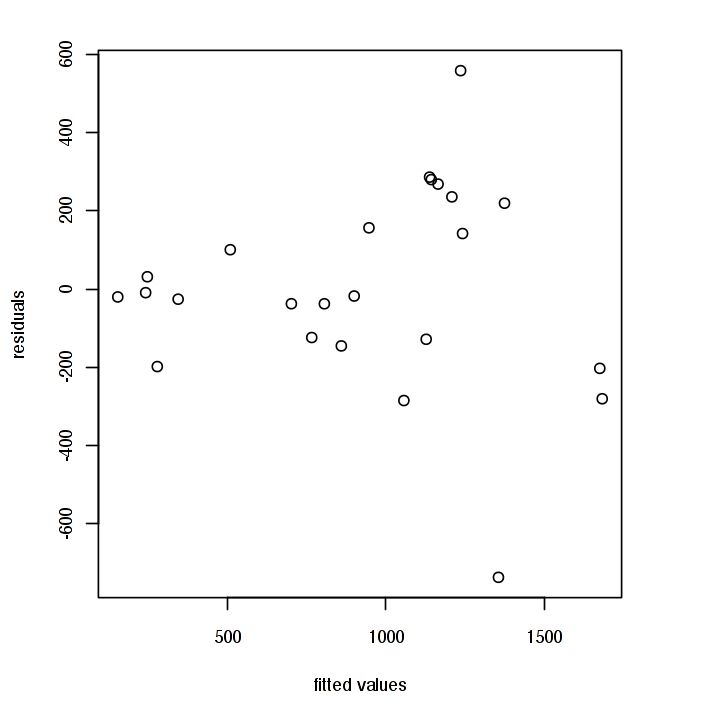

In [5]:
print(fitted(hub.mod))
plot(fitted(hub.mod),residuals(hub.mod),xlab="fitted values",
ylab="residuals")

two points, 3, 15, have high variance. lets remove em and see

In [6]:
hub.mod1 <- lm(y~x-1,data=hubble[-c(3,15),])
summary(hub.mod1)


Call:
lm(formula = y ~ x - 1, data = hubble[-c(3, 15), ])

Residuals:
   Min     1Q Median     3Q    Max 
-304.3 -141.9  -26.5  138.3  269.8 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x    77.67       2.97   26.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 180.5 on 21 degrees of freedom
Multiple R-squared:  0.9702,	Adjusted R-squared:  0.9688 
F-statistic: 683.8 on 1 and 21 DF,  p-value: < 2.2e-16


he Hubble constant estimates have units of $(km)s^{−1} (Mpc)^{−1}$.  
A Mega-parsec is 3.09 × 1019km, so we need to divide $\hat{\beta}$ by this amount, in order to obtain Hubble’s
constant with units of $s^{−1}$.  
The approximate age of the universe, in seconds, is then given by the reciprocal of $\beta^{-1}$.

Here are the two possible estimates expressed in years:

In [7]:
print(c(coef(hub.mod),coef(hub.mod1)))
hubble.const <- c(coef(hub.mod),coef(hub.mod1))/3.09e19
age <- 1/hubble.const
age/(60^2*24*365)

       x        x 
76.58117 77.67292 


x           x 
12794692825 12614854757

Lets add a distributionality assumption.  
Let $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$ for all i.  
That is, $Y_i ~\sim~ \mathcal{N}(x_i \beta, \sigma^2)$

Also,

Hence
$$
\hat{\beta} = \mathcal{N}\left( \beta, \left(\sum x_i\right)^{-1} \sigma^2 \right)
$$

# Practical linear models

In [8]:
data(sperm.comp1)

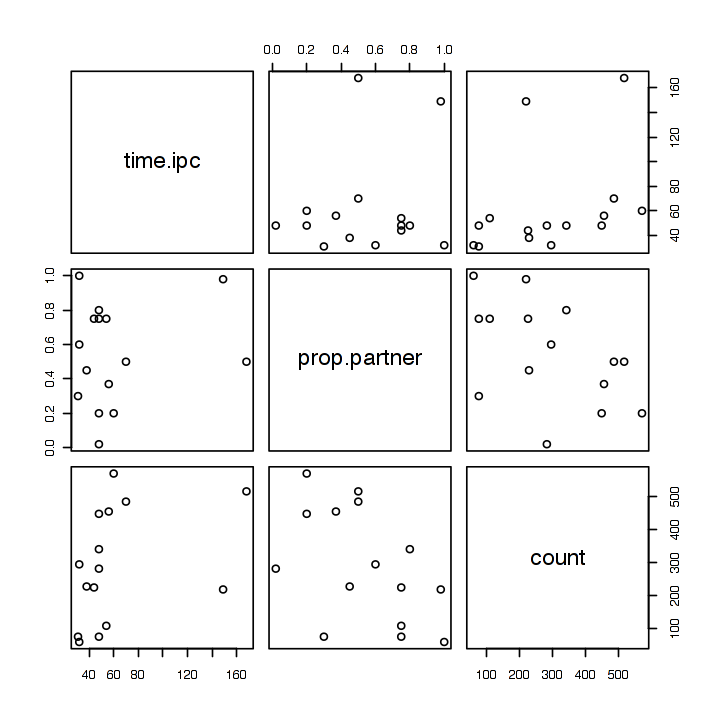

In [9]:
pairs(sperm.comp1[,-1])


Following Baker & Bellis, a reasonable model would be
$$
y_i = \beta_0 + t_i \beta_1 + p_i \beta_2 + \epsilon_i
$$
where
* $y_i$: sperm count (count)
* $t_i$: time spent since last copulation (time.ipc)
* $p_i$: proportion of time, since last copulation, that the pair have spent together (prop.partner)
* $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$

In [10]:
sc.mod1 <- lm(count ~ time.ipc+prop.partner,sperm.comp1)
summary(sc.mod1)


Call:
lm(formula = count ~ time.ipc + prop.partner, data = sperm.comp1)

Residuals:
     Min       1Q   Median       3Q      Max 
-239.740  -96.772    2.171   96.837  163.997 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)   357.4184    88.0822   4.058  0.00159 **
time.ipc        1.9416     0.9067   2.141  0.05346 . 
prop.partner -339.5602   126.2535  -2.690  0.01969 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 136.6 on 12 degrees of freedom
Multiple R-squared:  0.4573,	Adjusted R-squared:  0.3669 
F-statistic: 5.056 on 2 and 12 DF,  p-value: 0.02554


In [11]:
model.matrix(sc.mod1)

,(Intercept),time.ipc,prop.partner
1,1.0,60.0,0.2
2,1.00,149.00,0.98
3,1.0,70.0,0.5
4,1.0,168.0,0.5
5,1.0,48.0,0.2
6,1,32,1
7,1.00,48.00,0.02
8,1.00,56.00,0.37
9,1.0,31.0,0.3
10,1.00,38.00,0.45


standardized residuals:  s
the residuals have been scaled, by dividing them by their estimated standard deviation

In [47]:
res1 = residuals.lm(sc.mod1)
std_dev = sqrt(var(res1))
print('std_dev')
print(std_dev)
res_std = res1/std_dev

[1] "std_dev"
[1] 126.475


Cook's distance

$$
d_k = \frac{1}{(p+1)\hat{\sigma}^2} \sum_{i=1}^n
\left(
  \hat{\mu}_i^{[ks]} - \hat{\mu}_i
\right)^2
$$

In [67]:
fitted.values(sc.mod1)

1         2         3         4         5         6         7         8 
406.00295 313.94923 323.55099 513.82869 382.70364  79.98976 443.82447 340.51128 
        9        10        11        12        13        14        15 
315.74027 278.39751 195.94555 207.59520 215.81383 178.96754 188.17911

In [66]:
fitted.values(sc.mod1)[-5]

1         2         3         4         6         7         8         9 
406.00295 313.94923 323.55099 513.82869  79.98976 443.82447 340.51128 315.74027 
       10        11        12        13        14        15 
278.39751 195.94555 207.59520 215.81383 178.96754 188.17911

In [71]:
p=2
fv_all = fitted.values(sc.mod1)
var_all = var(fv_all)
cook_number1 <- function(k) {
    fv_k = fitted.values(lm(count ~ time.ipc+prop.partner,sperm.comp1[-k,]))
    sum((fv_k-fv_all[-k])**2)/((p+1)*var_all)
}
cook_distances = sapply(1:15, cook_number1)

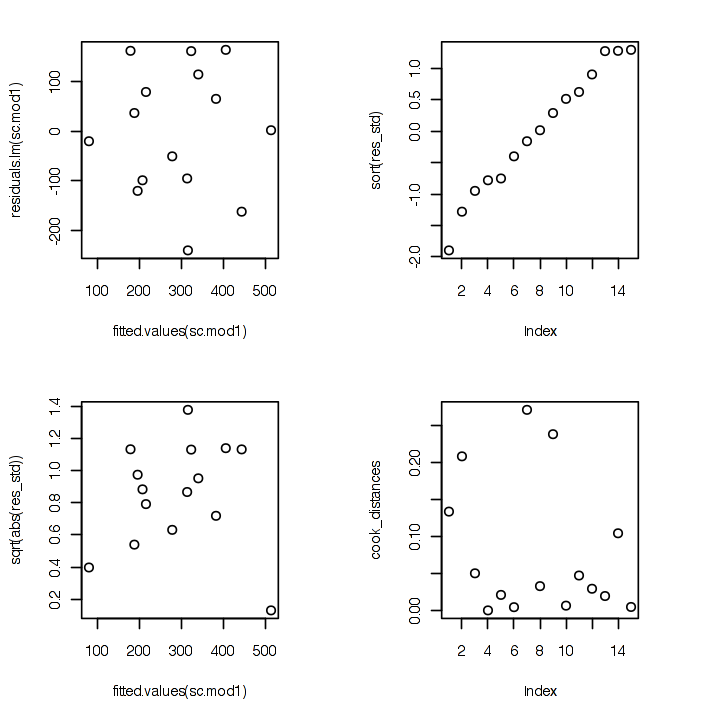

In [74]:
par(mfcol=c(2,2))
plot(fitted.values(sc.mod1), residuals.lm(sc.mod1))
plot(fitted.values(sc.mod1), sqrt(abs(res_std)))
plot(sort(res_std))
plot(cook_distances)